<a href="https://colab.research.google.com/github/Romeela/Happy-Customers-/blob/main/Happy_Customers_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/ACME-HappinessSurvey2020.csv")
df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [2]:
x = df.iloc[:,[1,2,3,4,5,6]].values
y = df.iloc[:,0].values


In [5]:
from sklearn.datasets import make_classification

In [14]:
x,y = make_classification(n_samples = 10000, n_features = 10, n_informative = 3)

In [15]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size =0.2)

In [16]:
# Applying decision tree classifier 
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_pred,y_test)

0.9535

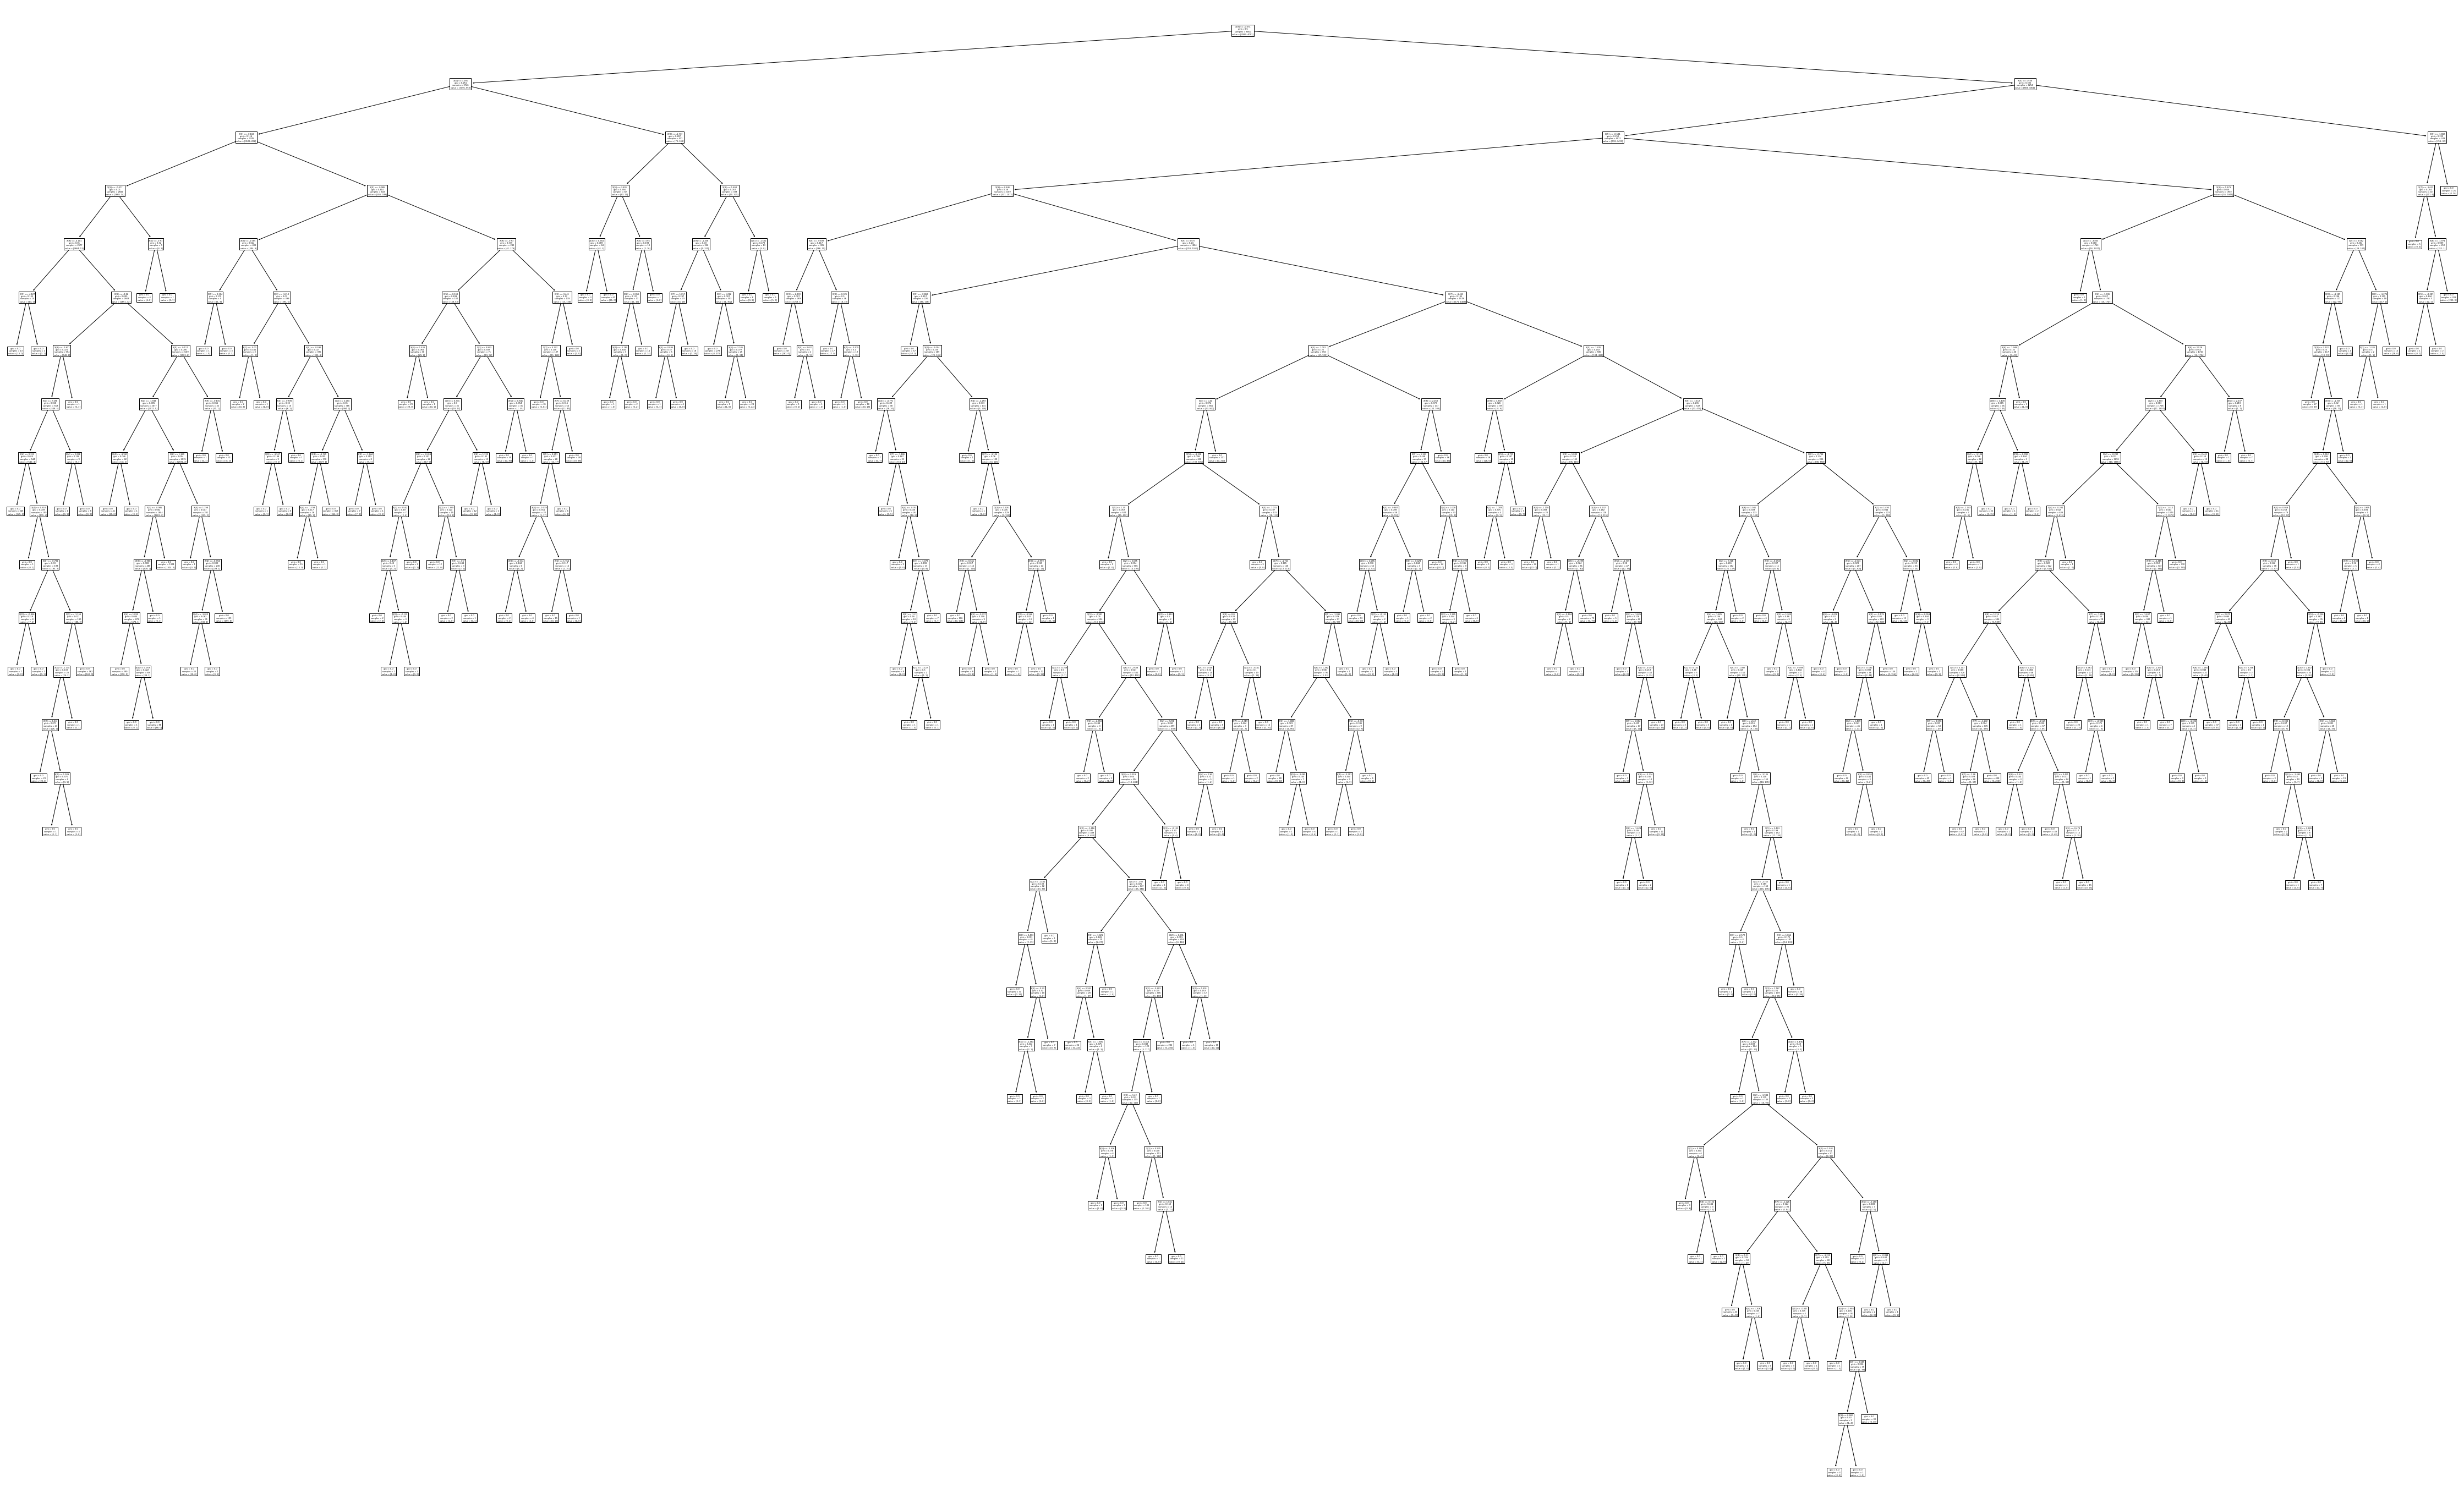

In [18]:
# Plot the decision tree 
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 80,50 
plot_tree(dt)
plt.show()

In [19]:
from sklearn.ensemble import BaggingClassifier 
bag = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 500,  #no of decision trees to consider 
    max_samples = 0.25,  # use 25% of 8000 rows available 
    bootstrap = True,    # sampling with replacement
    random_state = 42
)

In [20]:
bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=42)

In [21]:
y_pred = bag.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [22]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)

0.974

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)

In [24]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [25]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [26]:
accuracy_score(y_pred,y_test)

0.9775

In [29]:
# to find the best paramters using hyperparameter tuning 
from sklearn.model_selection import GridSearchCV 
paramaters = {
    'n_estimators' : [50,100],
    'max_samples'  : [0.4,0.25],
    'bootstrap'    : [True,False],
   'max_features' : [0.25,0.5] 
   }

search = GridSearchCV(BaggingClassifier(),paramaters,cv=5)
search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.25, 0.5],
                         'max_samples': [0.4, 0.25],
                         'n_estimators': [50, 100]})